In [2]:
import cv2 #import OpenCV
from matplotlib import pyplot as plt #import python plot graph
import matplotlib as mpl #import math library from python
import numpy as np

In [3]:
def get_figsize(im):
    # What size does the figure need to be in inches to fit the image?
    dpi = plt.rcParams['figure.dpi']
    dim = im.shape
    figuresize = dim[1]/float(dpi), dim[0]/float(dpi)
    return(figuresize)

In [4]:
def display_image_actual_size_single(im_data):
    figuresize = get_figsize(im_data)
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figuresize)
    # Add the single axis to fit the image to the screen boundary
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(im_data, cmap='gray')
    ax.axis('off')
    plt.show()
    return(fig)

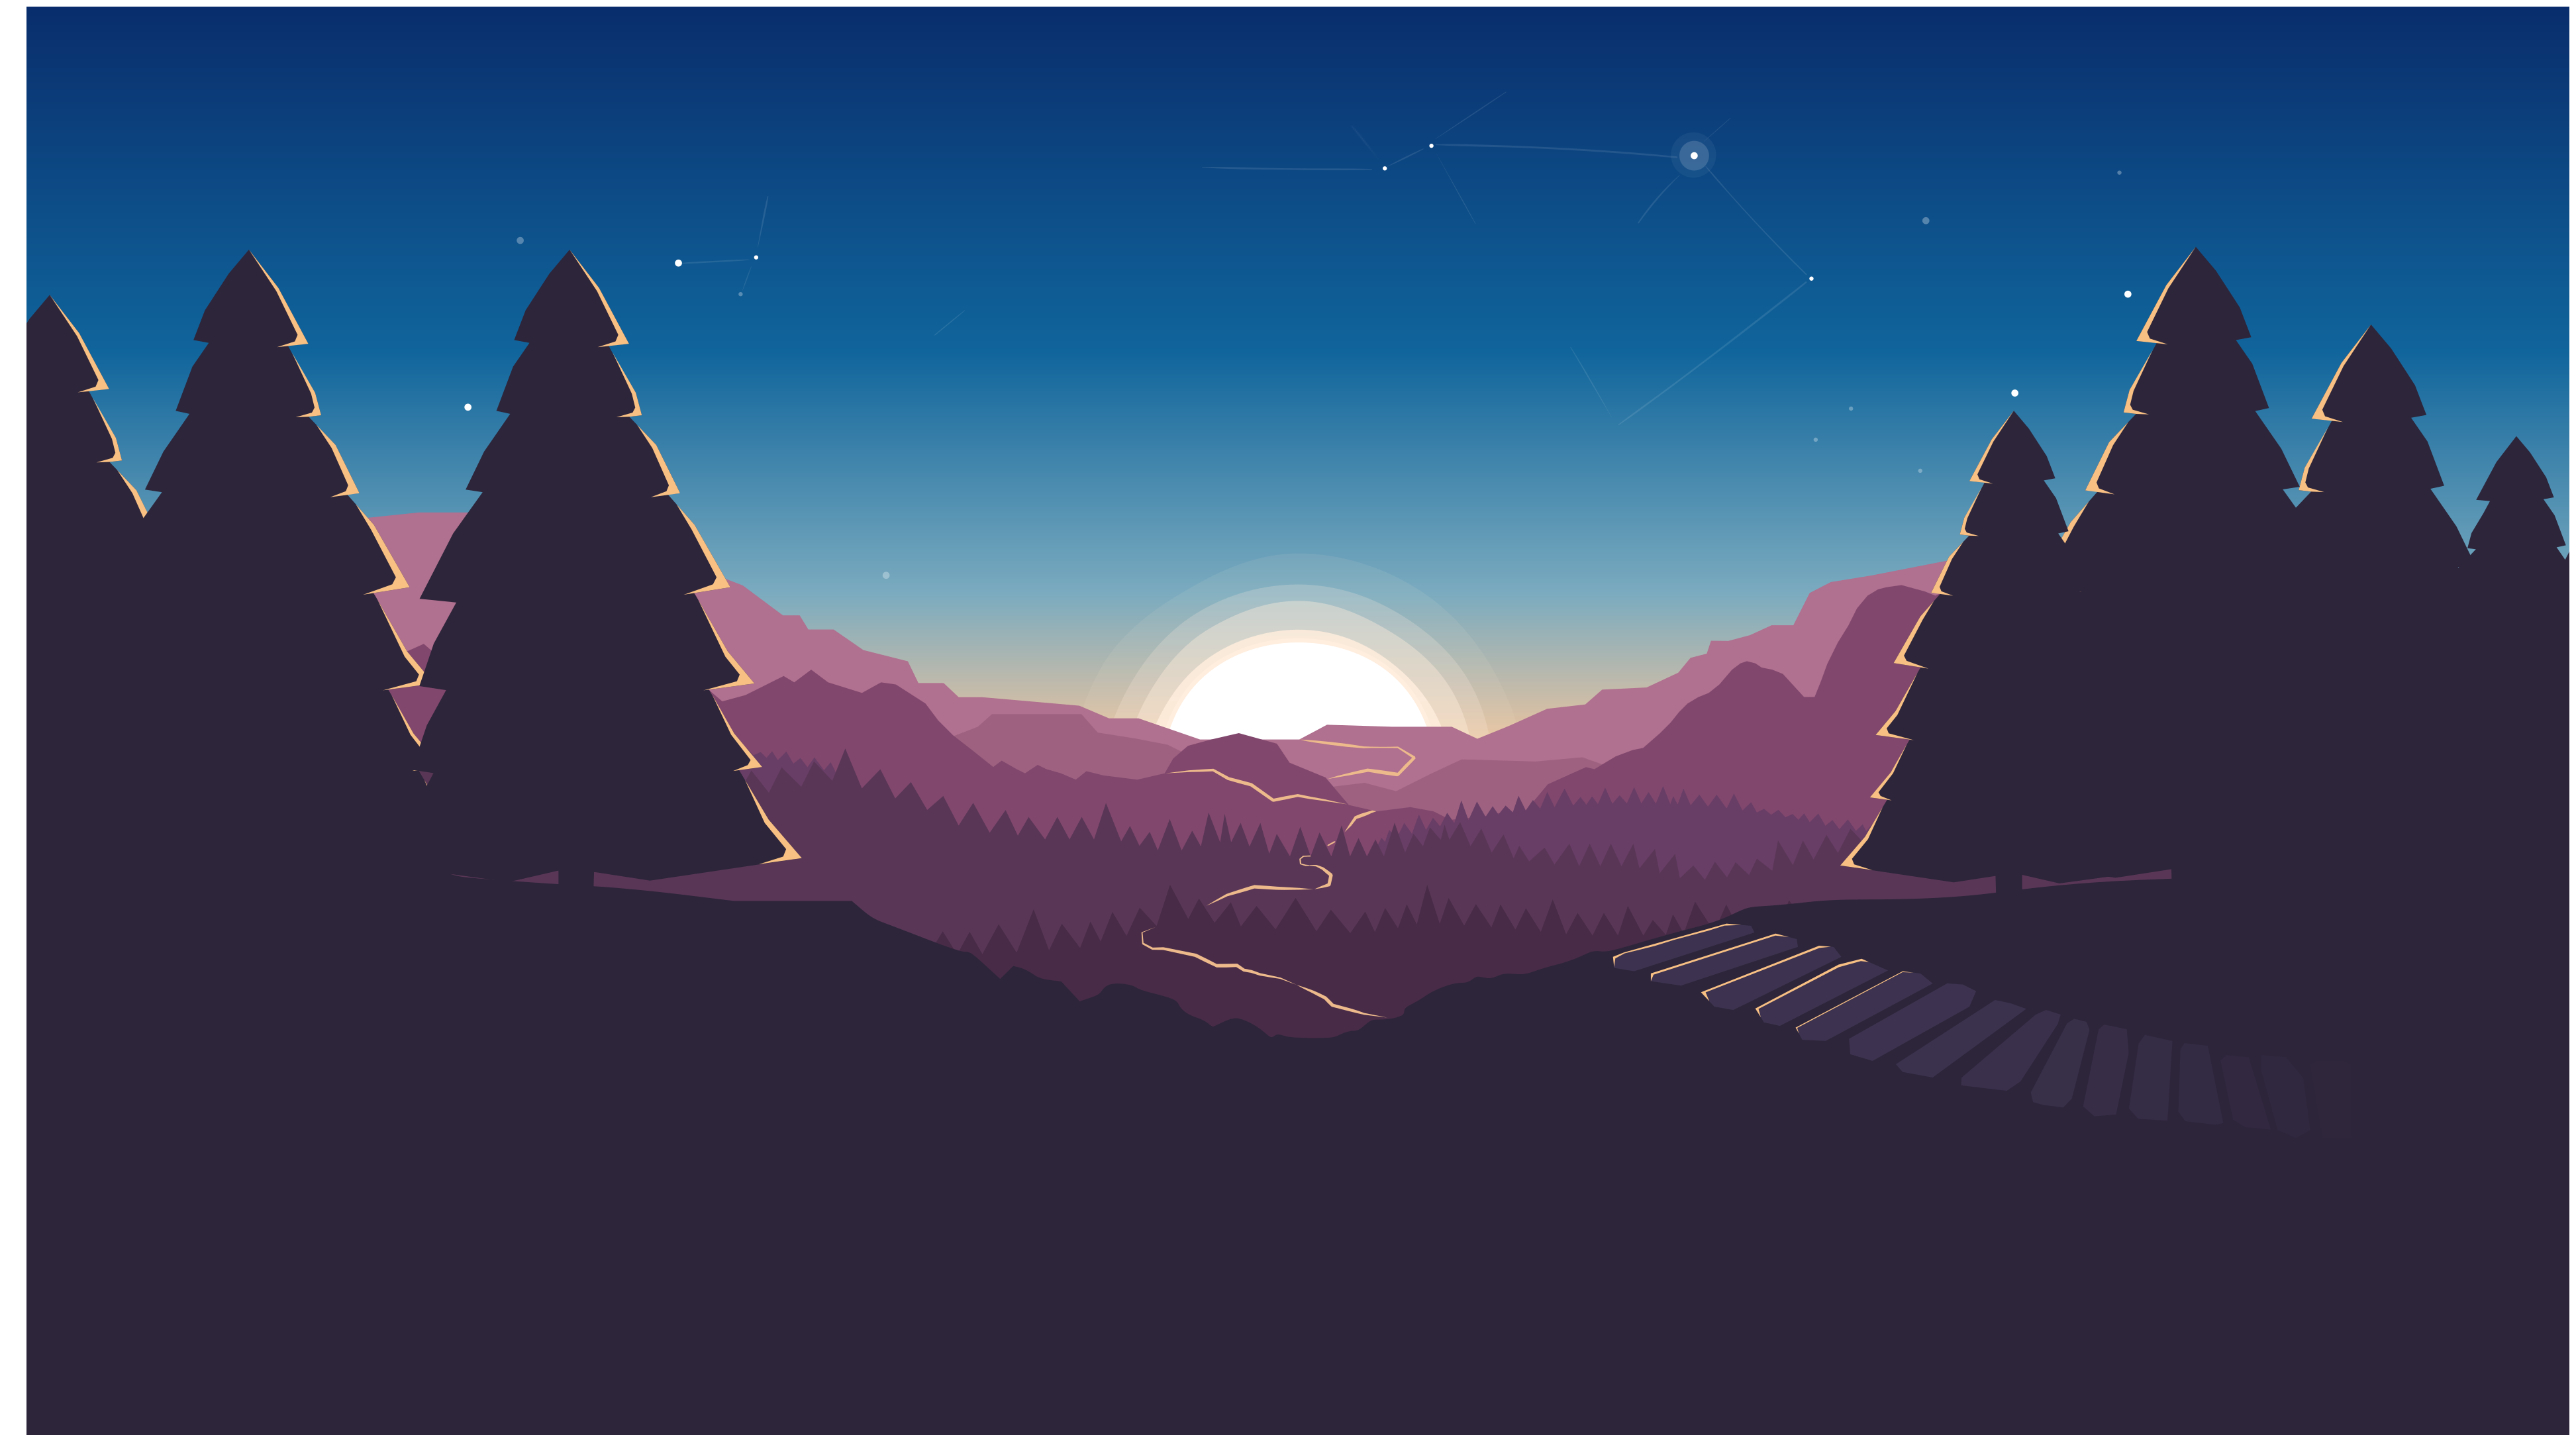

(2157, 3840, 3)


In [5]:
bg = cv2.imread('bg.jpg')
bg = cv2.cvtColor(bg,cv2.COLOR_BGR2RGB)
fig = display_image_actual_size_single(bg)
print(bg.shape)

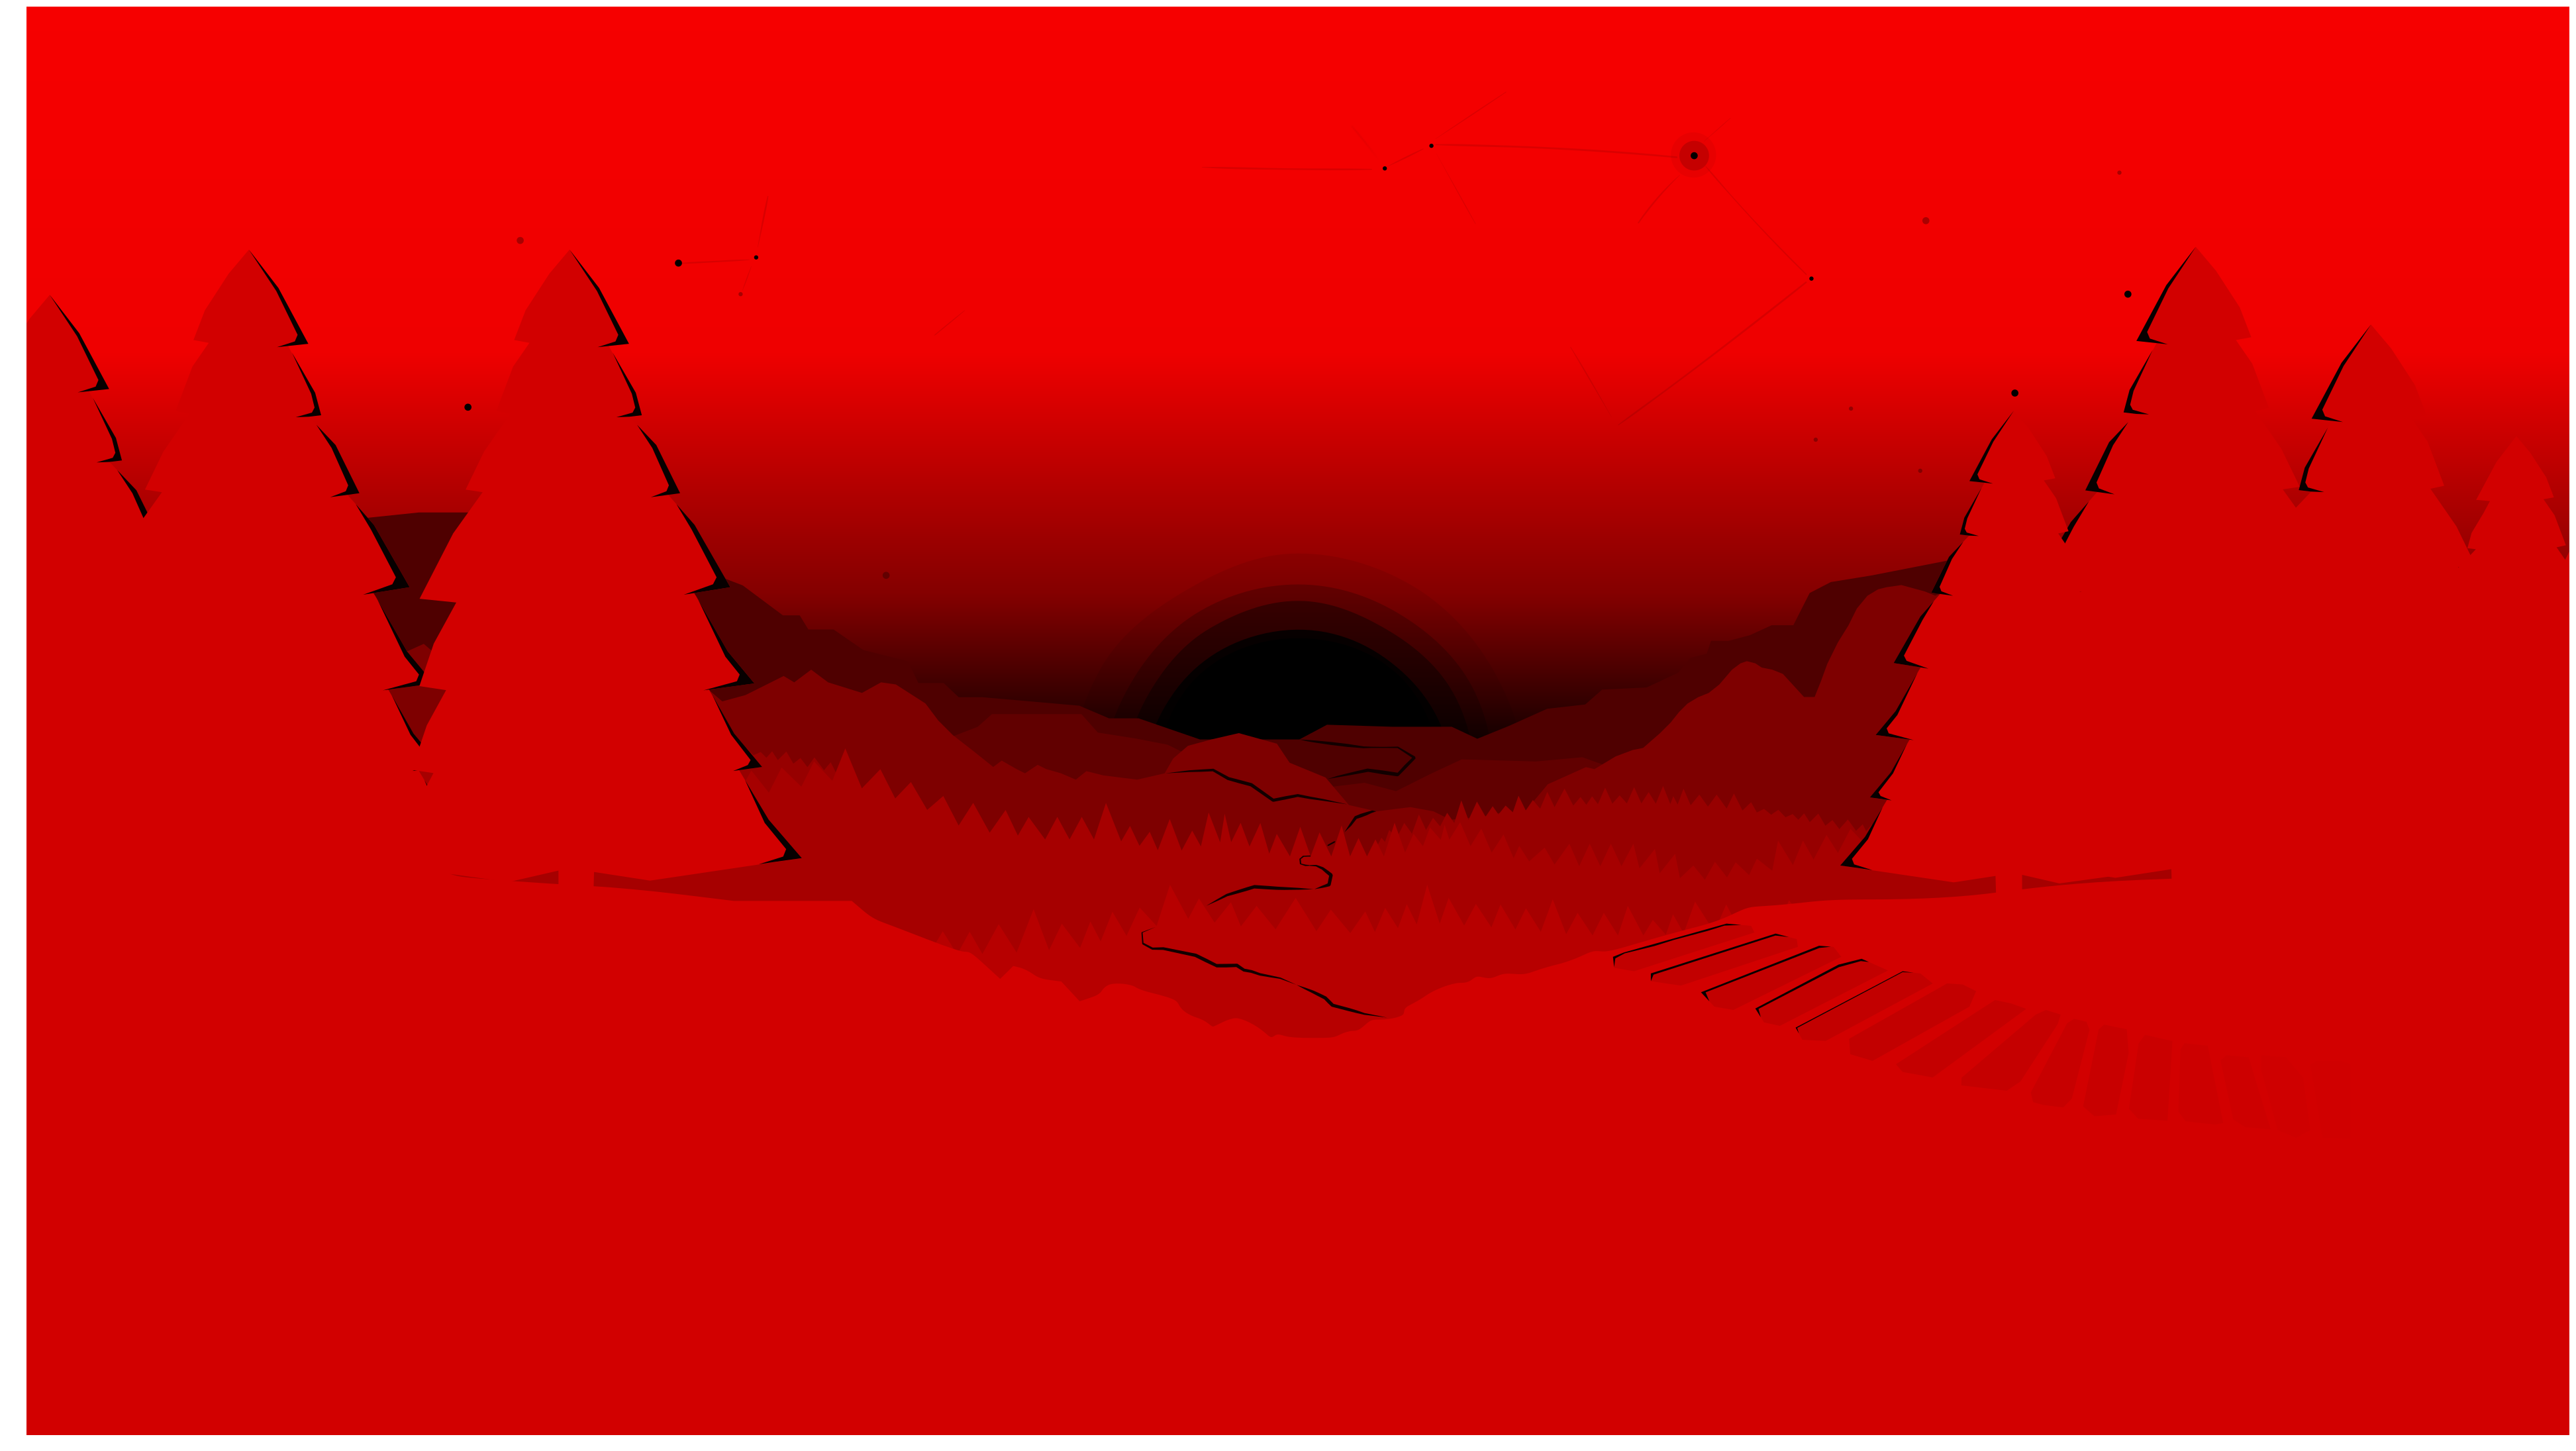

In [6]:
negative = cv2.subtract(255,bg)   
fig = display_image_actual_size_single(negative)

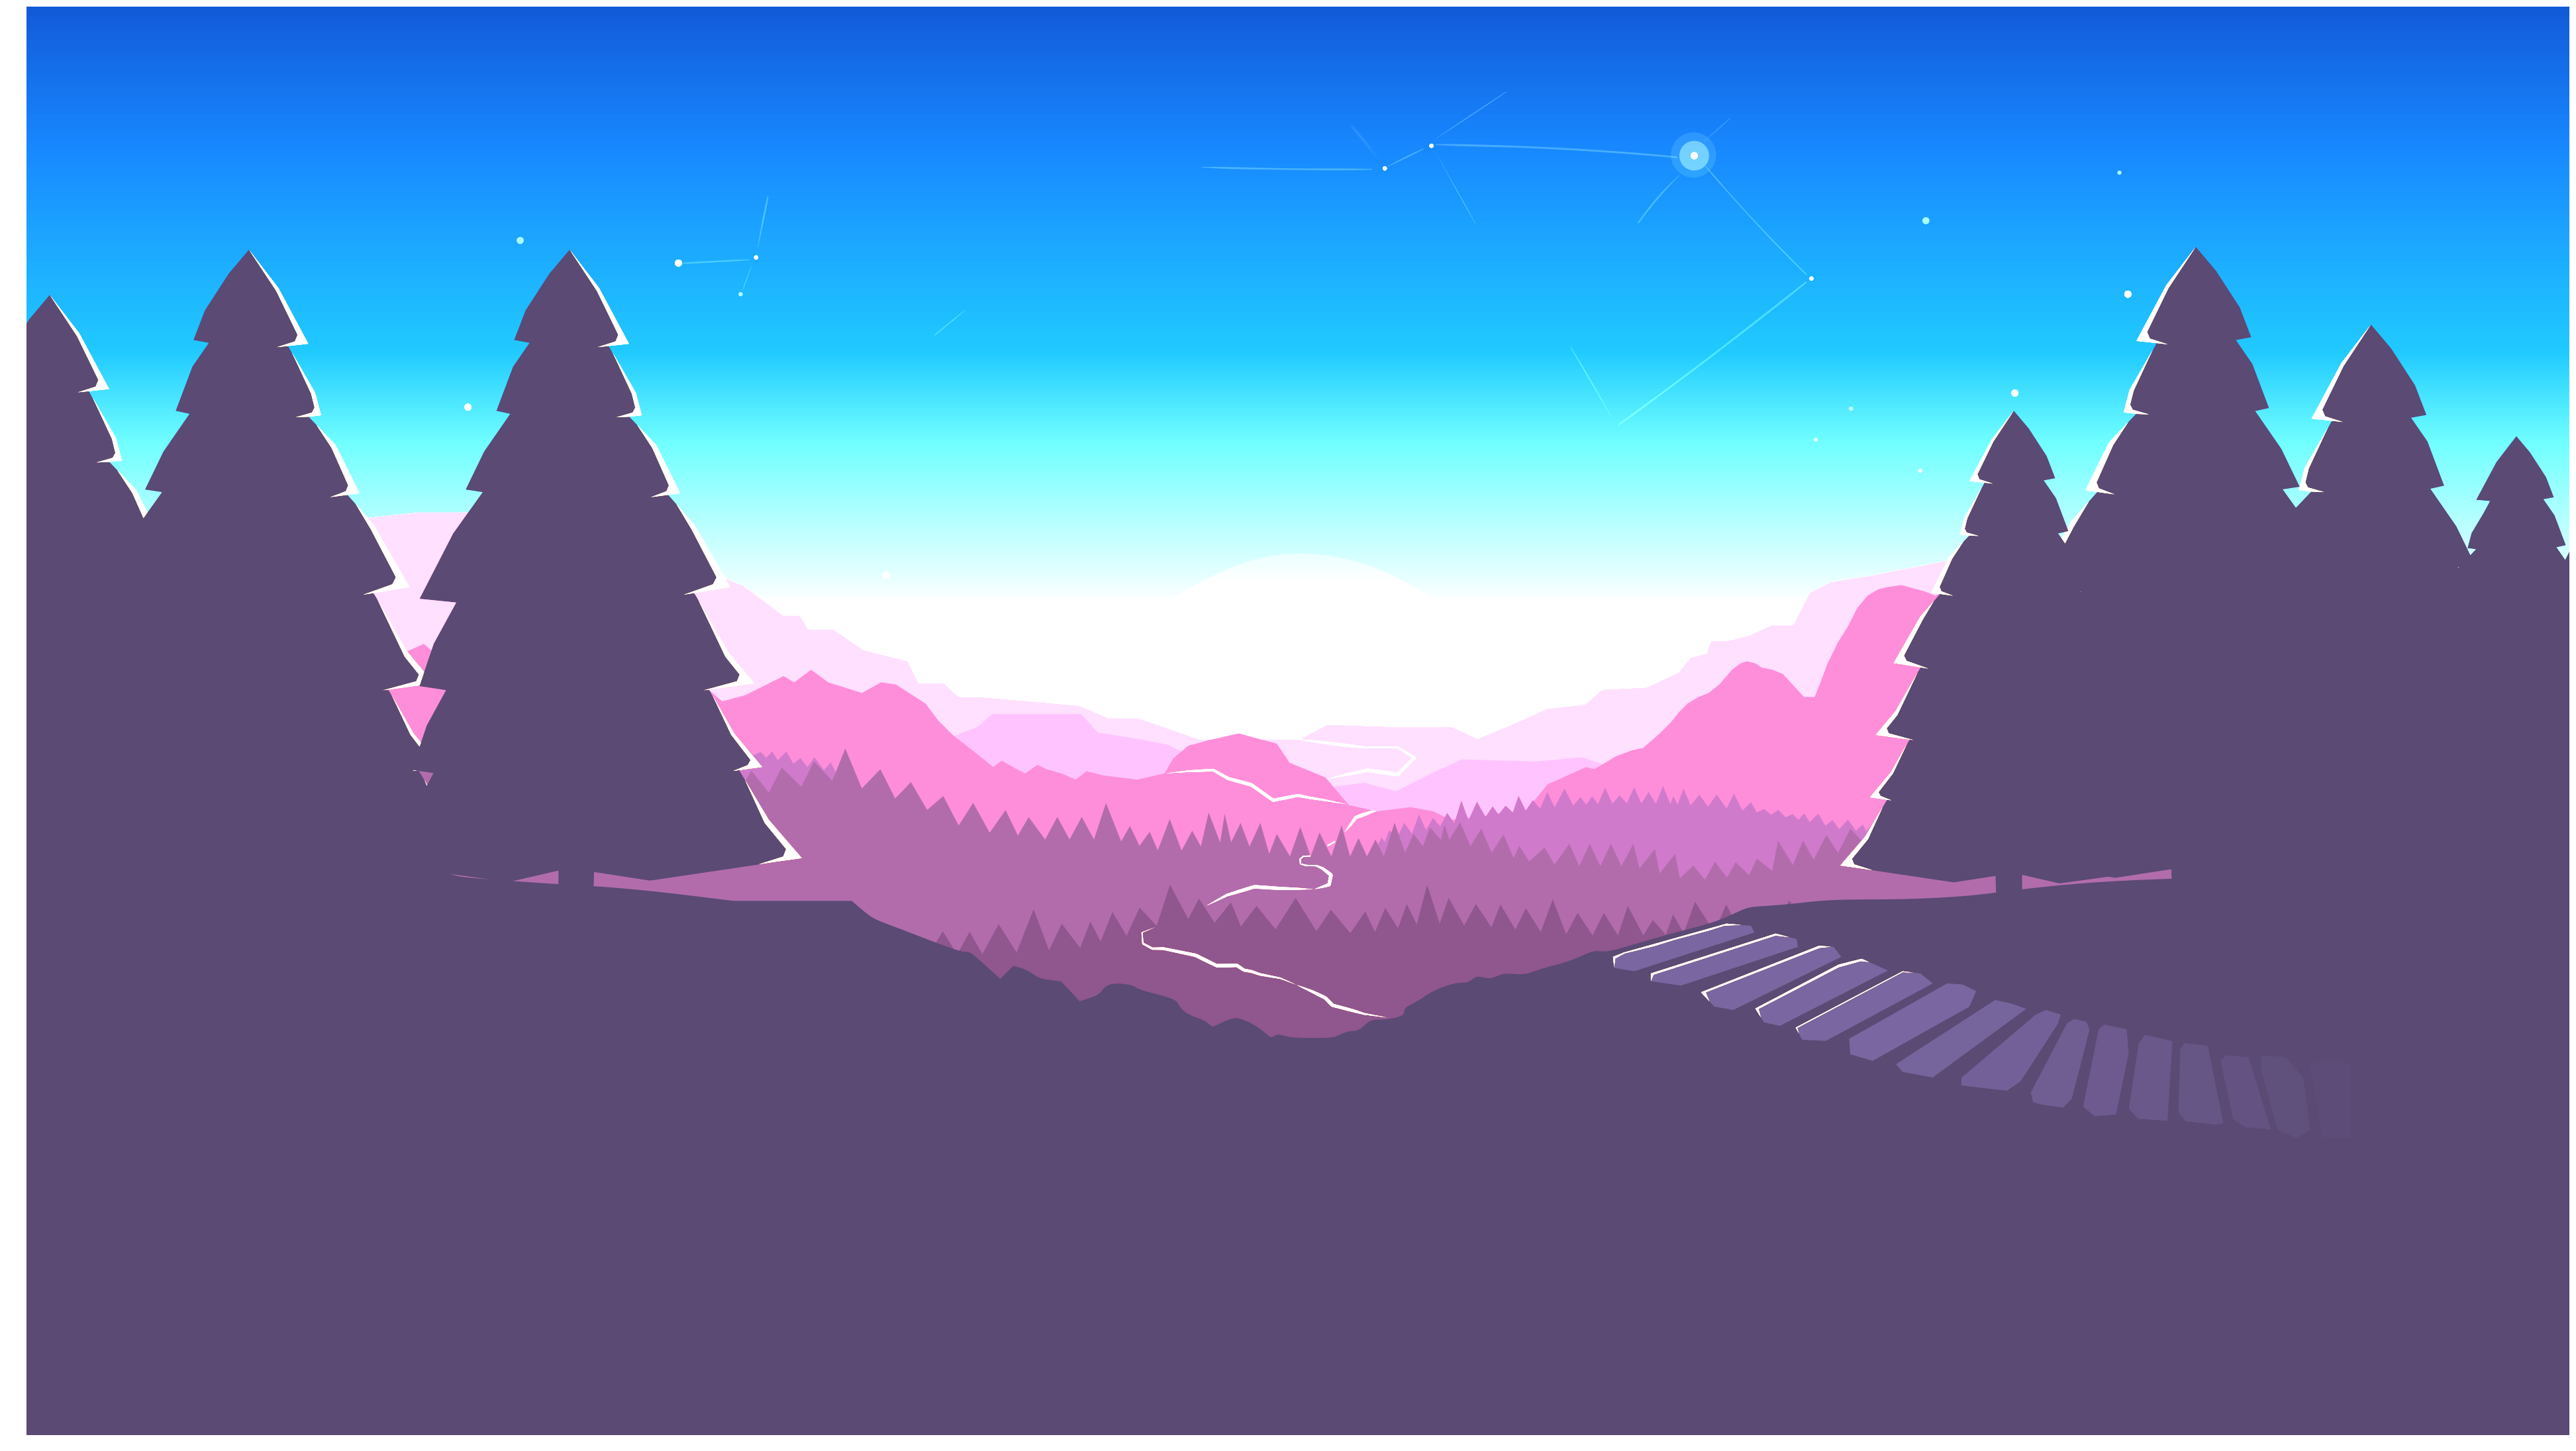

In [7]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi10 = bg[1530:2295, 0:765] 
Contrast = np.ones(bg.shape,dtype='uint8')
for i in np.arange(0,3):
    Contrast[:,:,i] = cv2.multiply(2,bg[:,:,i])
#Contrast = cv2.cvtColor(Contrast,cv2.COLOR_BGR2RGB)
fig = display_image_actual_size_single(Contrast)

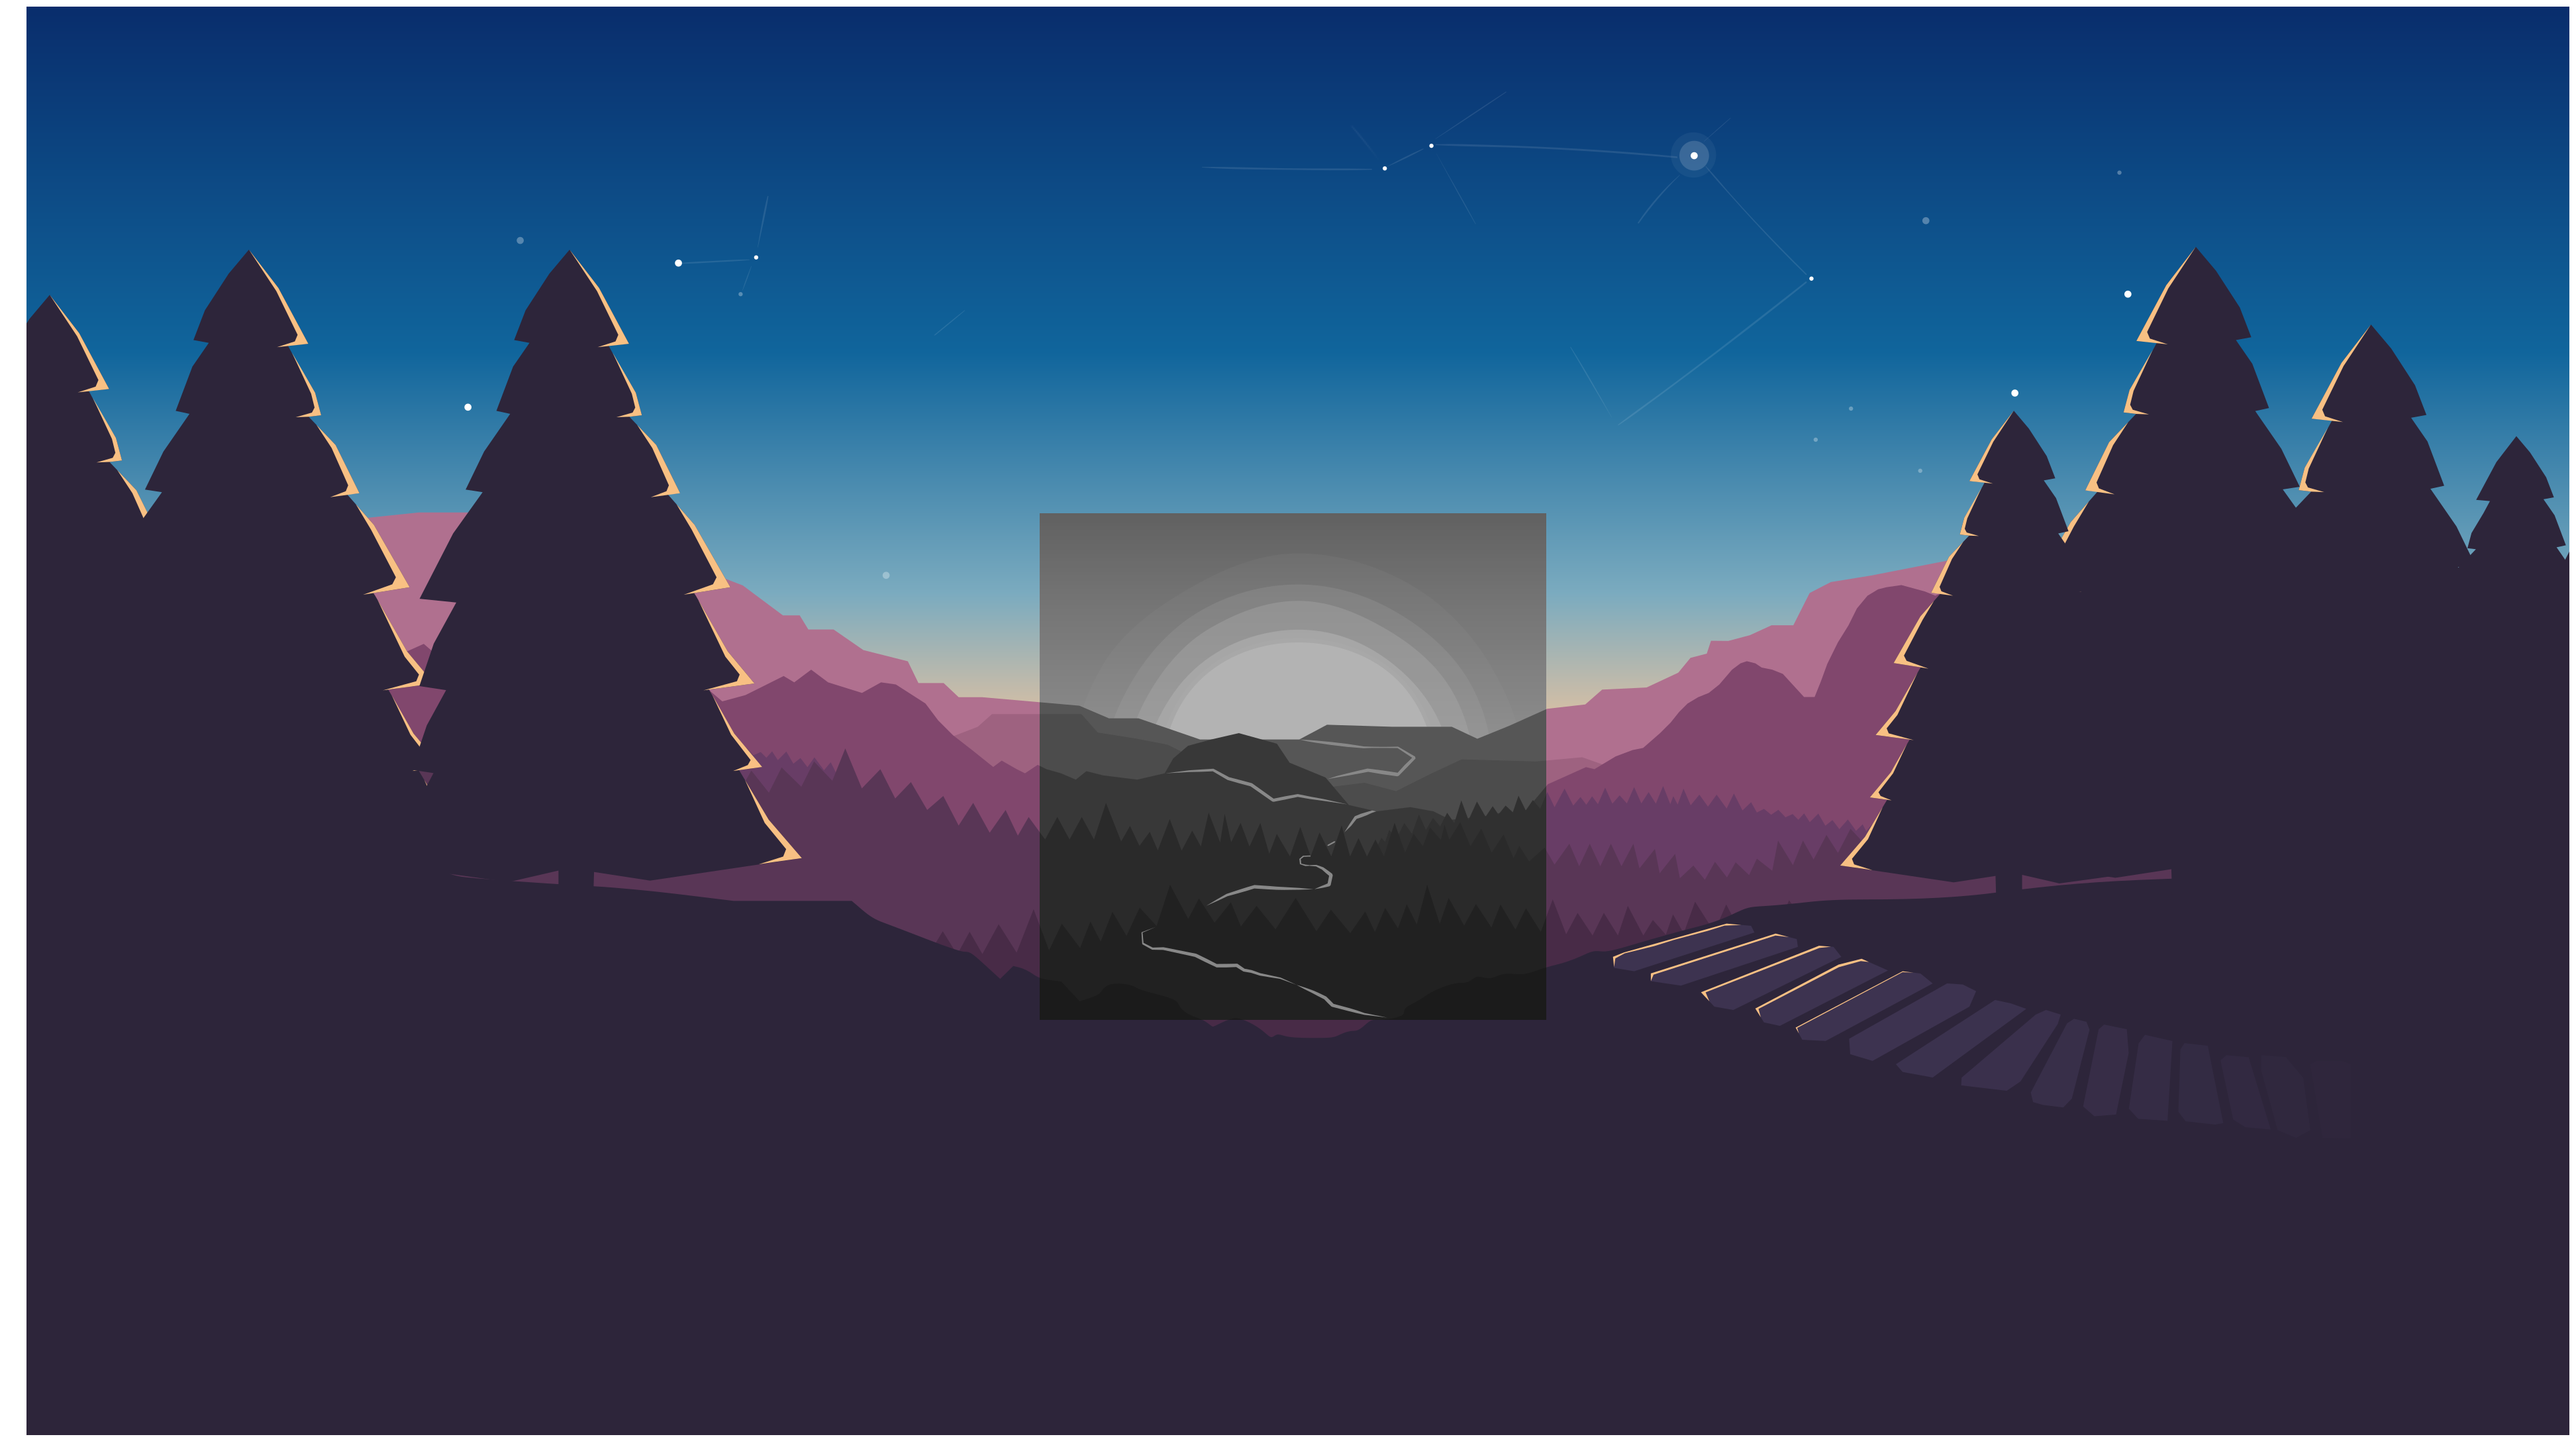

In [11]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi11 = bg[765:1530, 1530:2295] 
b,g,r = cv2.split(roi11)
onecolorD = roi11.copy()
onecolorD[:,:,2] = 0
convertbgr2gray = cv2.cvtColor(onecolorD,cv2.COLOR_BGR2GRAY)
convertgray2bgr = cv2.cvtColor(convertbgr2gray,cv2.COLOR_GRAY2BGR)
# plt.imshow(cv2.cvtColor(onecolorD,cv2.COLOR_RGB2GRAY))
bg[765:1530, 1530:2295] = convertgray2bgr
fig = display_image_actual_size_single(bg)


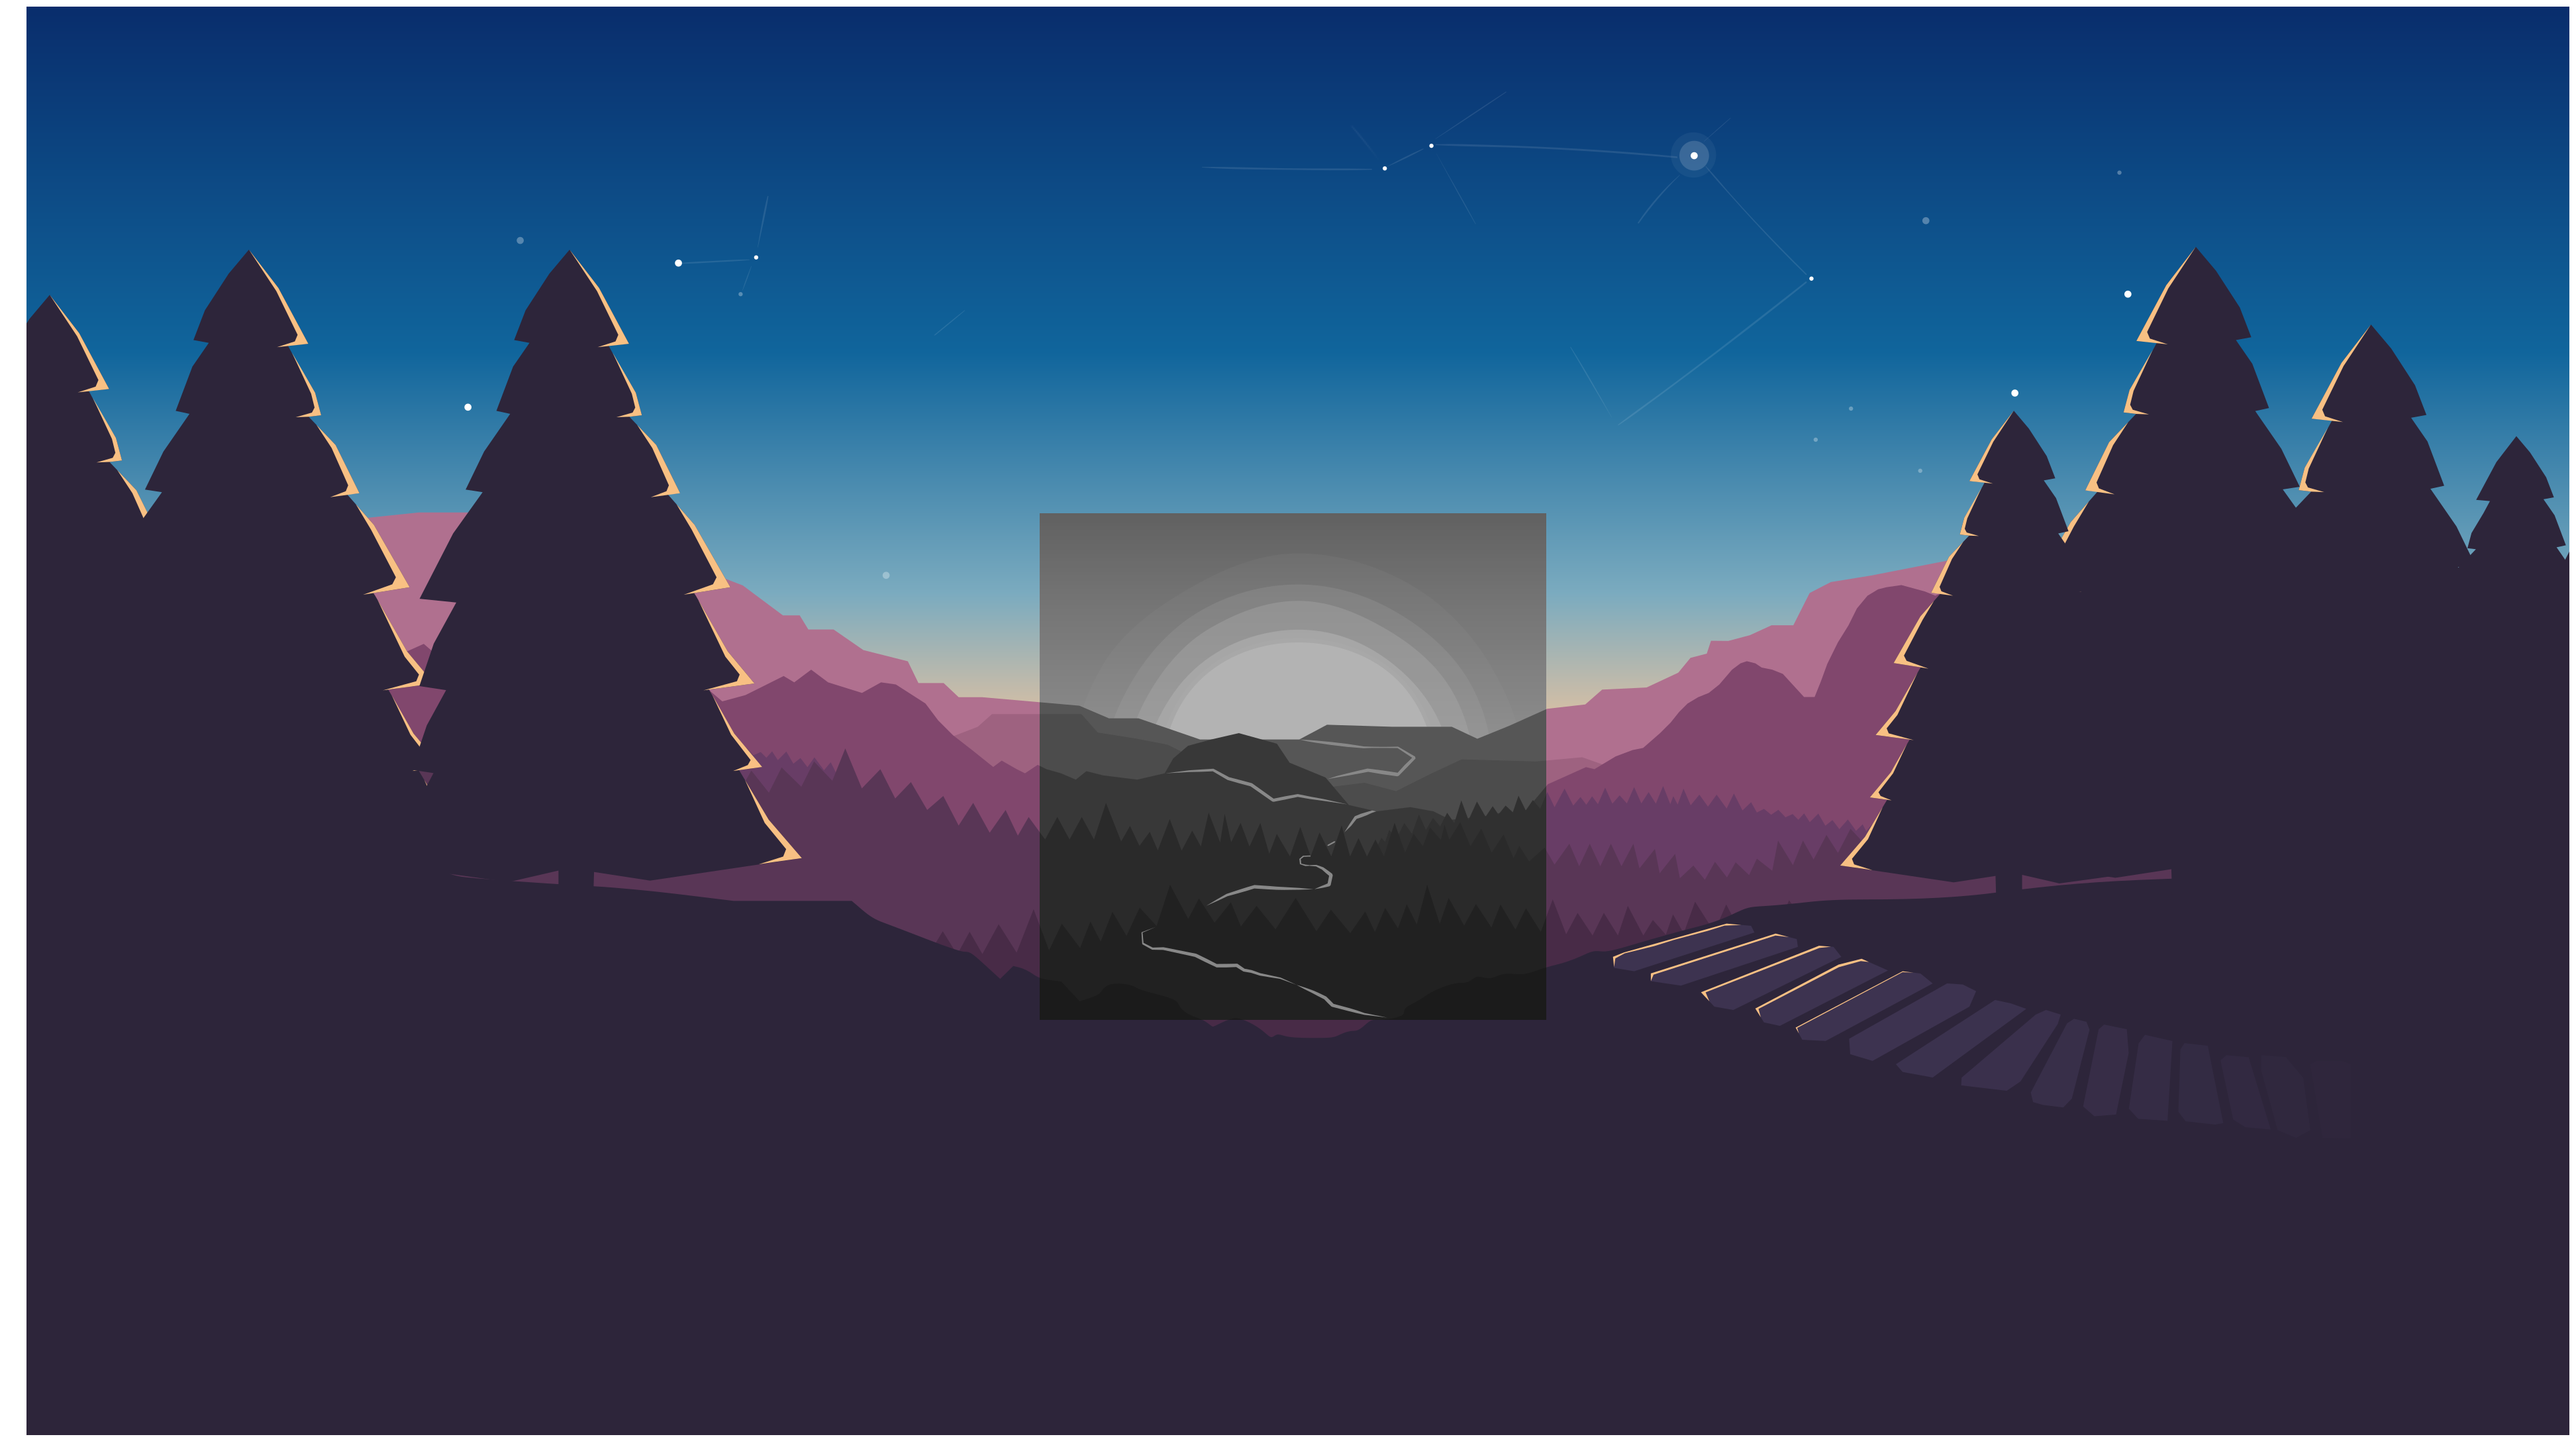

In [15]:
# draw green text on the image
roi12 = bg[765:1530, 1530:2295] 
output = roi12.copy()

cv2.putText(output, "OMG", (10, 25), 
	cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.imshow("Text", output)
fig = display_image_actual_size_single(bg)